### Electrical Vehicle Data (1997-2024)
 * This dataset shows the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered through the Washington State Department of Licensing (DOL)
the source of the dataset is shared by the Us government
below are the features of the dataset which are important to understand before working with the data.

#### Dataset information
- [x]  model year-> in which year the car is launched or it will be launched.

- [x] Make -> manufacturing company name

- [x] Model --> Car Model Name

- [x] Electric vehicle type --> type of electric vehicle(Battery Electric Vehicle or Plug-in Hybrid Electric Vehicle )

- [x] CAFV --> refers to vehicles that qualify for certain incentives, benefits, or programs based on their use of clean or alternative fuels.

- [x] Electric Range --> The term "electric range" refers to the distance or the maximum range that an electric vehicle (EV) can travel on a fully charged battery before it needs to be recharged. It represents the total driving distance an EV can cover solely using the energy stored in its battery pack.

- [x] Base MSRP ($)-->(Suggested price by Manufacturer it is a base price dealer have the freedom to change the price as desired ) It refers to the starting price set by the manufacturer for a particular vehicle model without any additional options, upgrades, or accessories.

- [x] (DOL)The Department of Licensing--> is a state agency in the United States that is responsible for various driver and vehicle-related services in the state of Washington. The DOL oversees the issuance and renewal of driver's licenses, identification cards, and vehicle registrations.

 - [x] Electric Utility -->Electric utilities are responsible for providing the necessary infrastructure to supply electricity to EV owners, including charging stations, grid connections, and electricity distribution networks. 


In [2]:
# load necessary libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('darkgrid')

In [3]:
# load the data
data = pd.read_csv('us_car_data.csv')
data.head()

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,CAFV,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Longitude,latitude
0,Thurston,Tumwater,WA,98512,2019,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,220,0,22,242565116,PUGET SOUND ENERGY INC,53067010910,-122.913102,47.013593
1,Island,Clinton,WA,98236,2022,NISSAN,LEAF,Battery Electric Vehicle,Eligibility unknown as battery range has not b...,0,0,10,183272785,PUGET SOUND ENERGY INC,53029972000,-122.359364,47.979655
2,Snohomish,Snohomish,WA,98290,2020,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,266,0,44,112552366,PUGET SOUND ENERGY INC,53061052502,-122.091505,47.915555
3,King,Seattle,WA,98134,2020,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,322,0,11,6336319,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033009300,-122.329815,47.579810
4,Snohomish,Edmonds,WA,98020,2013,TESLA,MODEL S,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,208,69900,21,186212960,PUGET SOUND ENERGY INC,53061050403,-122.375070,47.808070


In [4]:
#value_counts() for categorical variables
data['County'].value_counts()

County
King            70682
Snohomish       15226
Pierce          10394
Clark            7983
Thurston         4844
Kitsap           4452
Spokane          3326
Whatcom          3313
Benton           1687
Skagit           1500
Island           1495
Clallam           830
Jefferson         824
San Juan          802
Chelan            794
Yakima            735
Cowlitz           663
Mason             638
Lewis             515
Grays Harbor      475
Kittitas          453
Franklin          440
Grant             409
Walla Walla       344
Douglas           261
Whitman           230
Klickitat         217
Okanogan          191
Stevens           175
Pacific           164
Skamania          158
Asotin             55
Wahkiakum          45
Pend Oreille       40
Adams              39
Lincoln            32
Ferry              25
Columbia           15
Garfield            3
Name: count, dtype: int64

In [5]:
#check for missing values
data.isnull().sum()

County                   0
City                     0
State                    0
Postal Code              0
Model Year               0
Make                     0
Model                    0
Electric Vehicle Type    0
CAFV                     0
Electric Range           0
Base MSRP                0
Legislative District     0
DOL Vehicle ID           0
Electric Utility         0
2020 Census Tract        0
Longitude                0
latitude                 0
dtype: int64

In [6]:
#check for duplicates
data.duplicated().sum()

0

In [7]:
data.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract,Longitude,latitude
count,134474.000000,134474.000000,134474.000000,134474.000000,134474.000000,1.344740e+05,1.344740e+05,134474.000000,134474.000000
mean,98259.228520,2019.657250,74.730208,1451.396069,29.499911,2.063218e+08,5.303964e+10,-122.092668,47.467715
std,303.069045,3.001443,98.776037,9691.900720,14.786294,8.590842e+07,1.617660e+07,1.006671,0.615275
min,98001.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,5.300195e+10,-124.625140,45.583863
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.601798e+08,5.303301e+10,-122.405565,47.357985
50%,98122.000000,2021.000000,21.000000,0.000000,34.000000,2.059191e+08,5.303303e+10,-122.296385,47.613850
75%,98370.000000,2022.000000,150.000000,0.000000,43.000000,2.308773e+08,5.305307e+10,-122.151665,47.715580
max,99403.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.307794e+10,-117.044370,48.996340


In [8]:
#check for outliers
def outliers(data):
    for i in data.describe().columns:
        q1 = data.describe().at['25%',i]
        q3 = data.describe().at['75%',i]
        iqr = q3
        iqr = q3 - q1
        lower = q1 - (1.5 * iqr)
        upper = q3 + (1.5 * iqr)
        print('The outliers in {} are {}'.format(i,data[(data[i] < lower) | (data[i] > upper)][i]))
outliers(data)

The outliers in Postal Code are 16        98937
33        99163
44        98908
52        99009
72        98908
          ...  
134361    99163
134412    99354
134418    99320
134444    99004
134446    99354
Name: Postal Code, Length: 7856, dtype: int64
The outliers in Model Year are 83        2011
144       2011
273       2011
755       2011
778       2011
          ... 
133796    2011
133834    2011
133874    2011
133956    2011
134075    2011
Name: Model Year, Length: 875, dtype: int64
The outliers in Electric Range are Series([], Name: Electric Range, dtype: int64)
The outliers in Base MSRP are 4         69900
116       52900
147       69900
195       69900
222       45600
          ...  
134034    52650
134161    31950
134257    69900
134270    45600
134453    44100
Name: Base MSRP, Length: 3419, dtype: int64
The outliers in Legislative District are Series([], Name: Legislative District, dtype: int64)
The outliers in DOL Vehicle ID are 3           6336319
12          3267771
13   

<Axes: xlabel='County'>

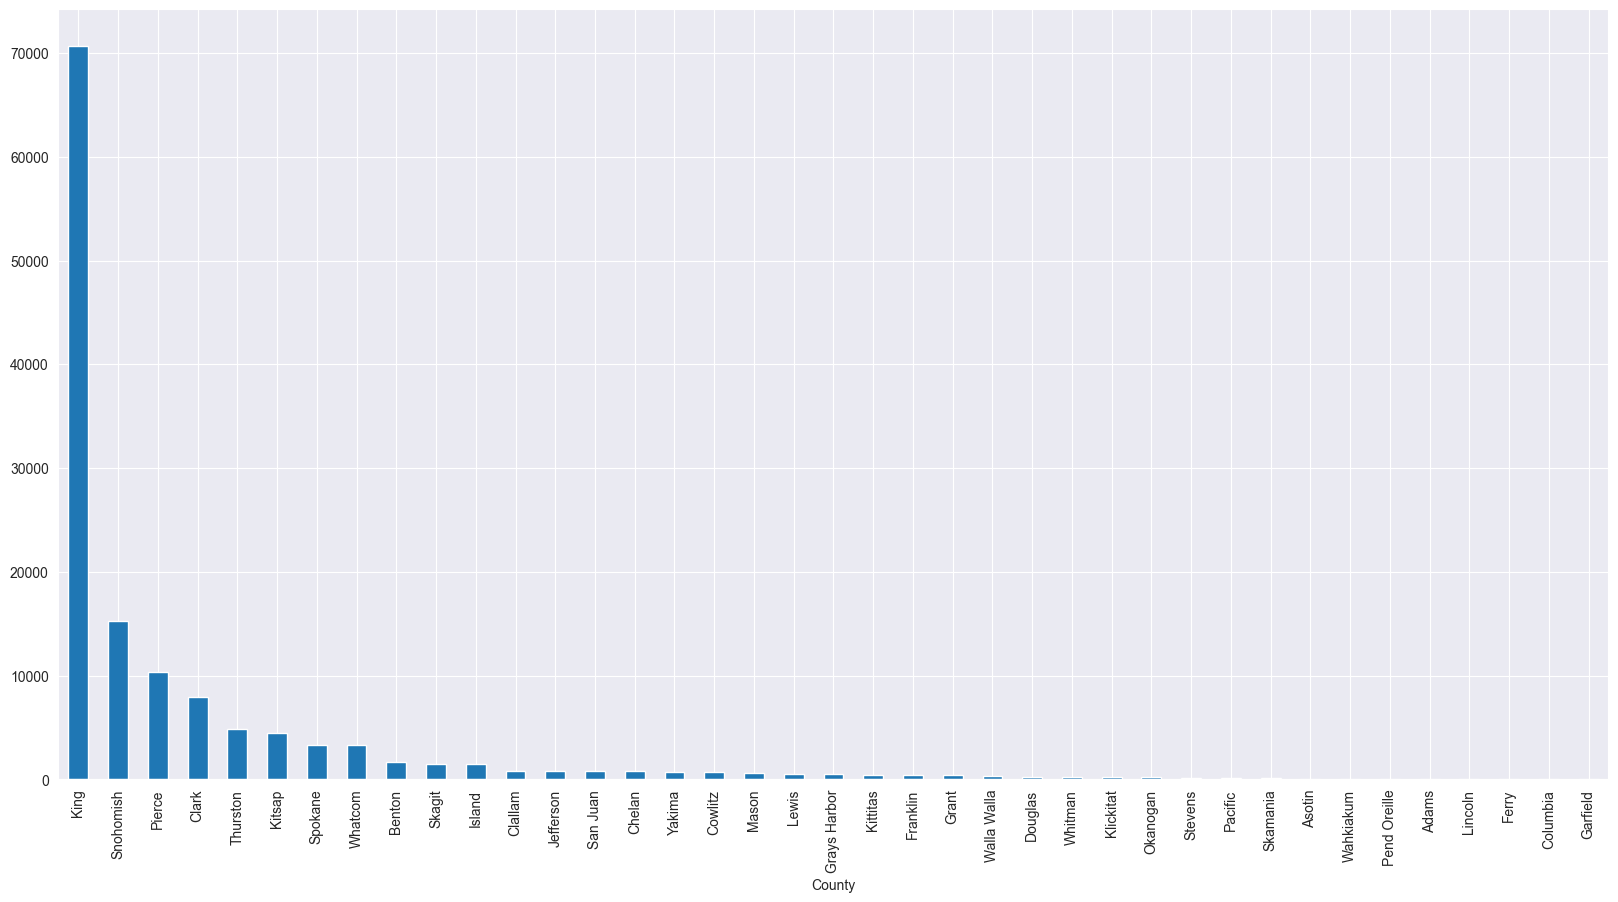

In [9]:
# explore the data
data['County'].value_counts().plot(kind='bar',figsize=(20,10))

<Axes: xlabel='Model Year'>

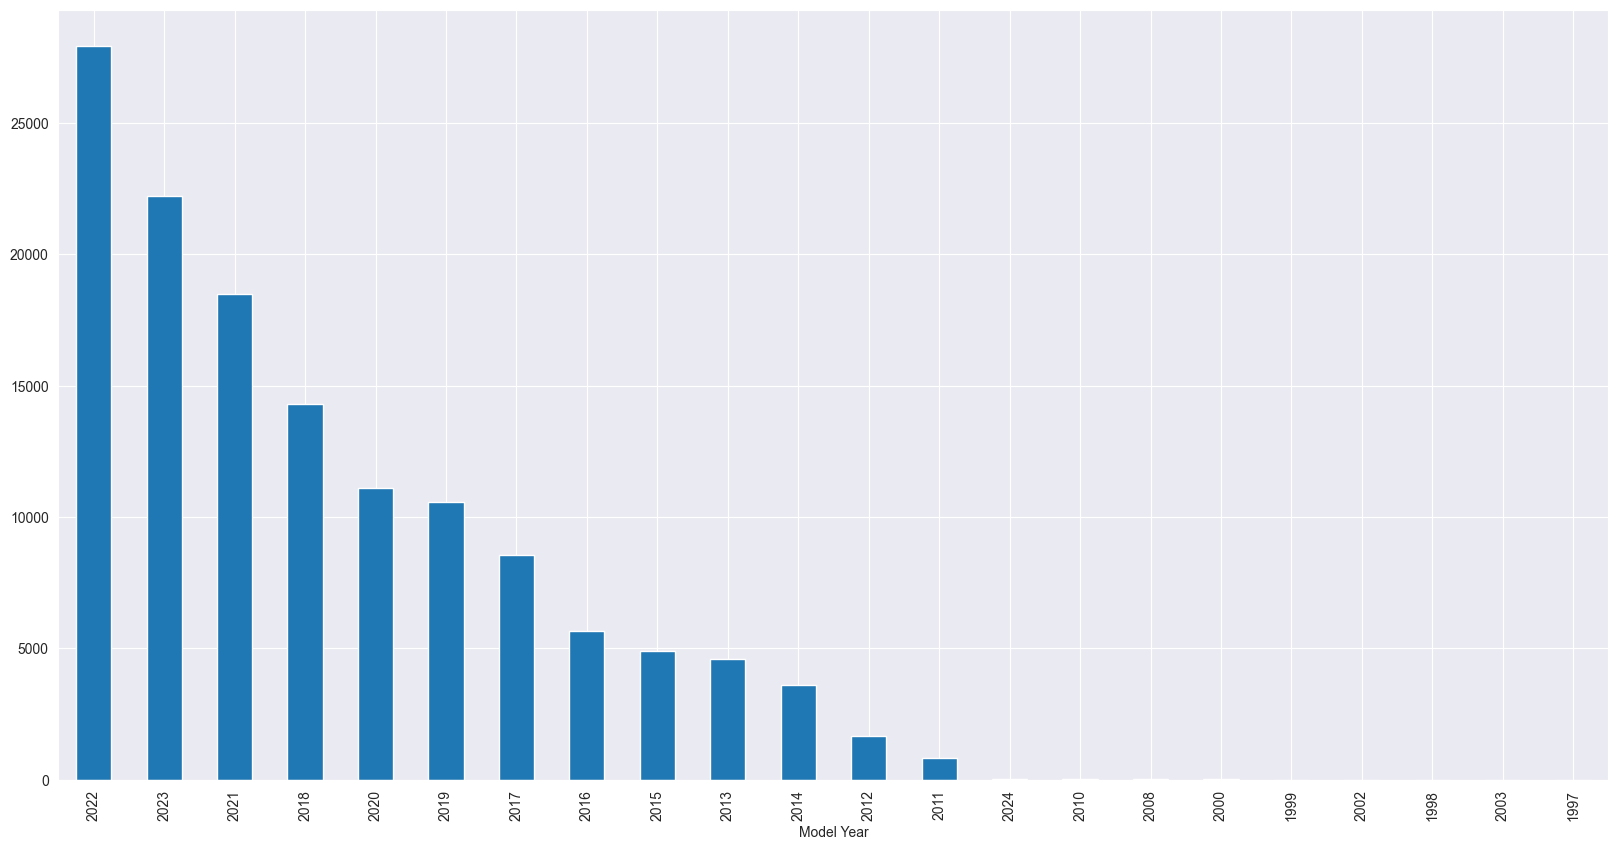

In [10]:
data['Model Year'].value_counts().plot(kind='bar',figsize=(20,10))


In [11]:
data['Model Year'].value_counts()

Model Year
2022    27919
2023    22209
2021    18478
2018    14314
2020    11119
2019    10555
2017     8557
2016     5676
2015     4910
2013     4589
2014     3588
2012     1655
2011      815
2024       30
2010       23
2008       19
2000        9
1999        4
2002        2
1998        1
2003        1
1997        1
Name: count, dtype: int64

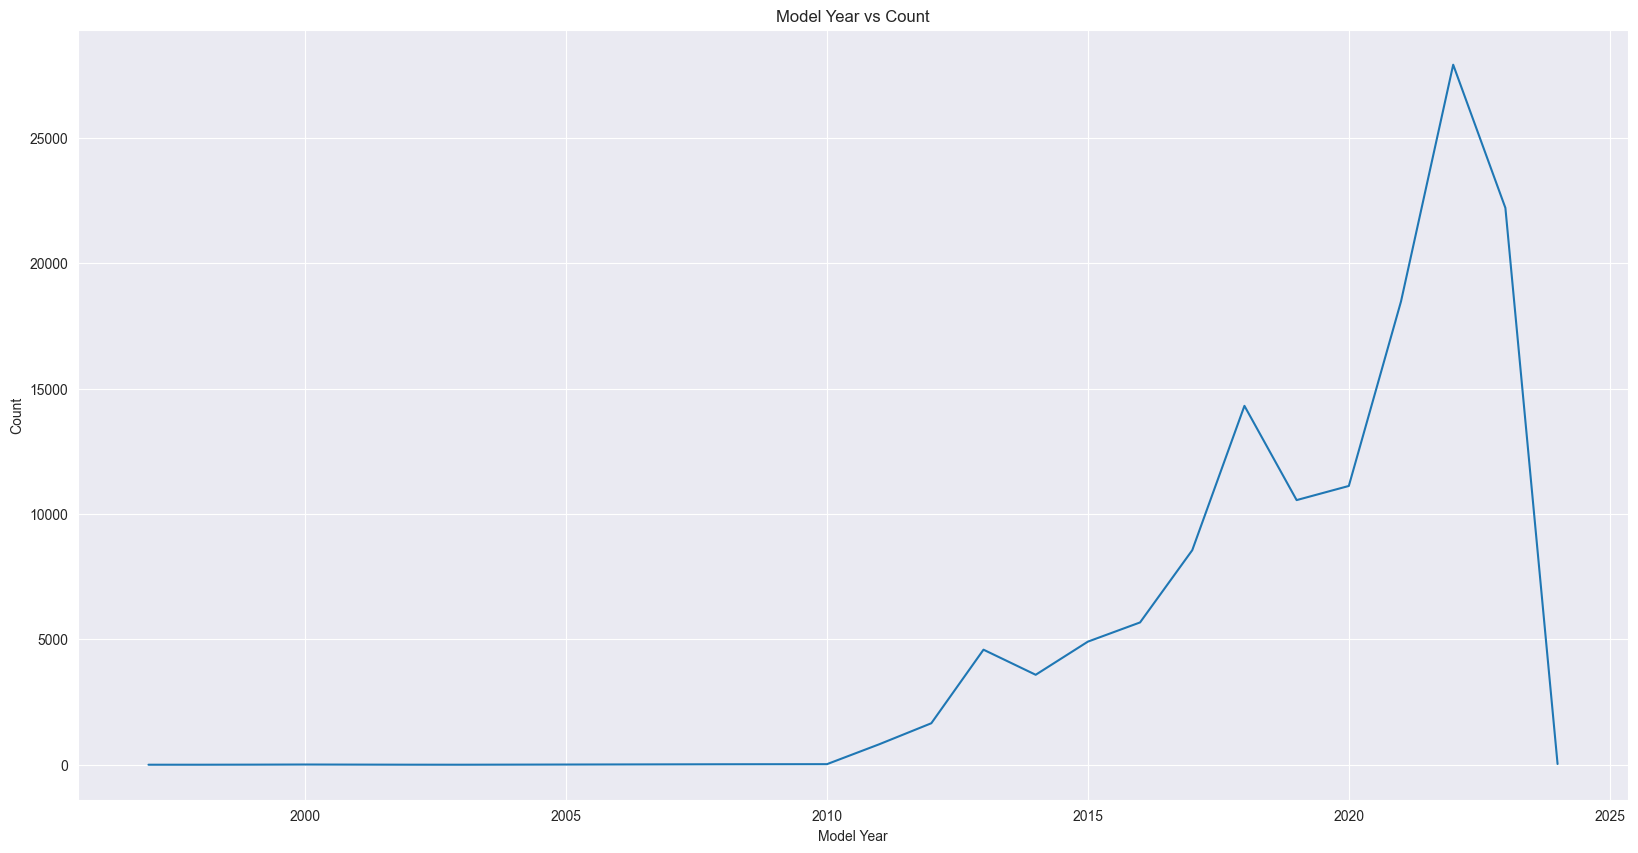

In [14]:
#plot line graph for model year
data['Model Year'].value_counts().sort_index().plot(kind='line',figsize=(20,10))
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.title('Model Year vs Count')
plt.show()

In [15]:
#count for electric vehicles types
data['Electric Vehicle Type'].value_counts()

Electric Vehicle Type
Battery Electric Vehicle              103424
Plug-in Hybrid Electric Vehicle        31050
Name: count, dtype: int64

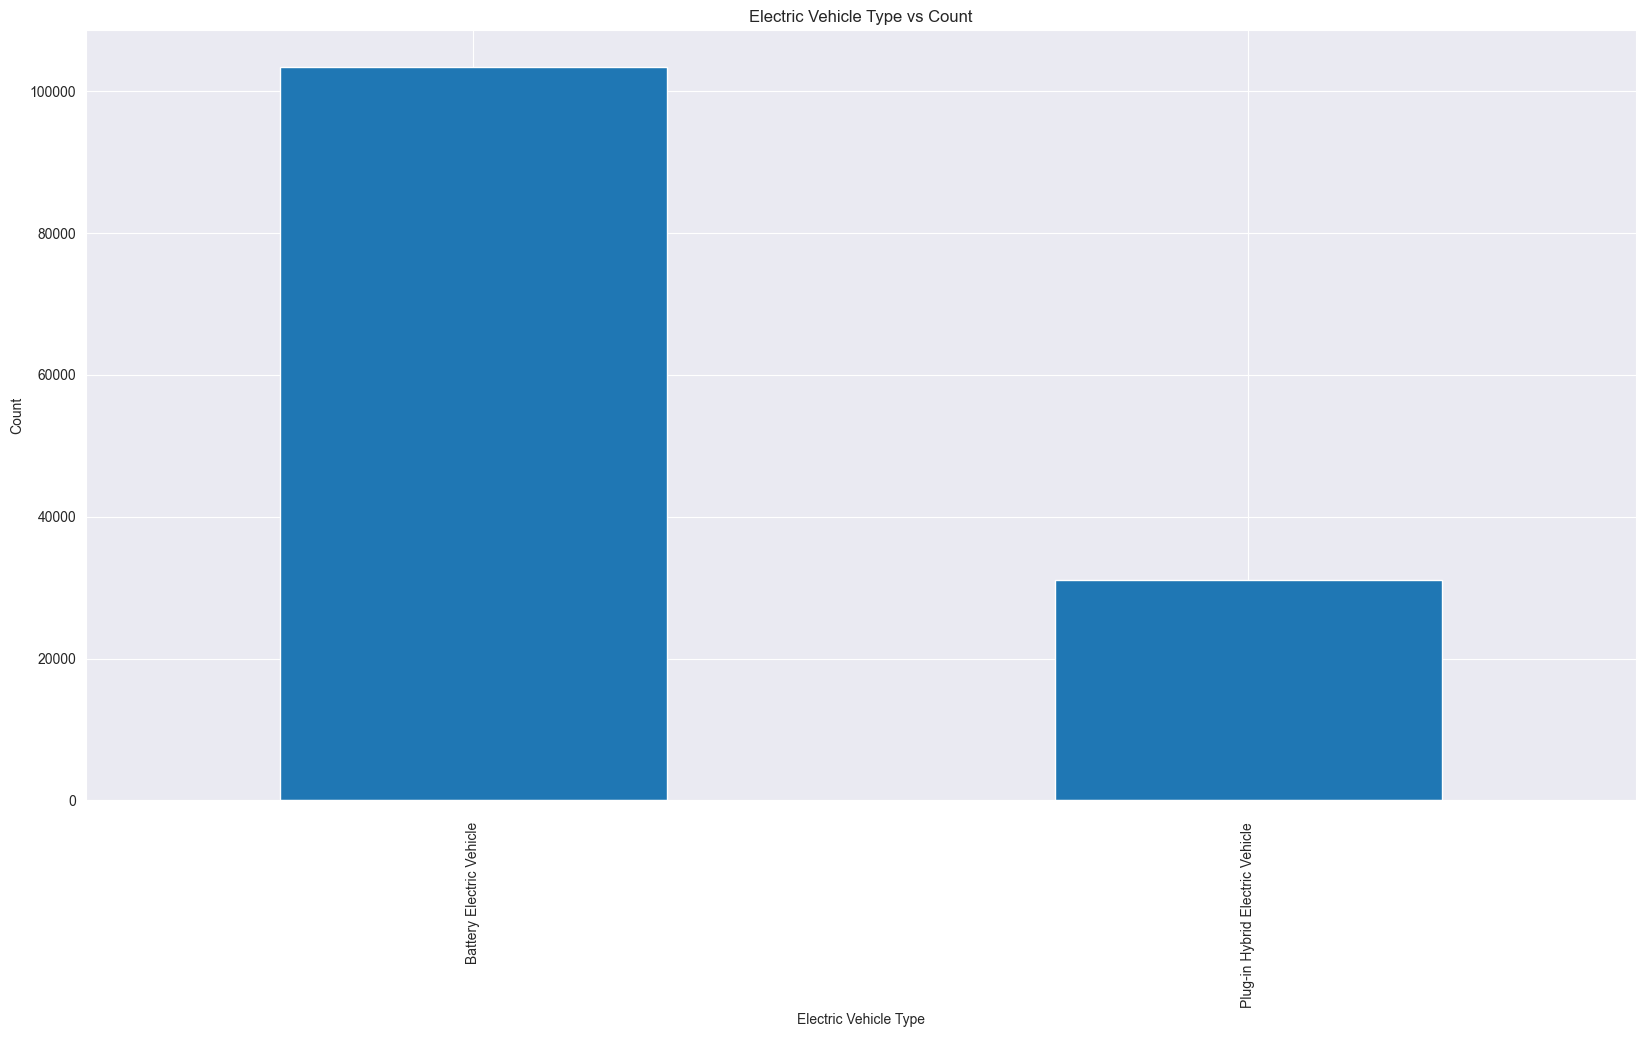

In [16]:
#plot bar graph for electric vehicle types
data['Electric Vehicle Type'].value_counts().plot(kind='bar',figsize=(20,10))
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Count')
plt.title('Electric Vehicle Type vs Count')
plt.show()

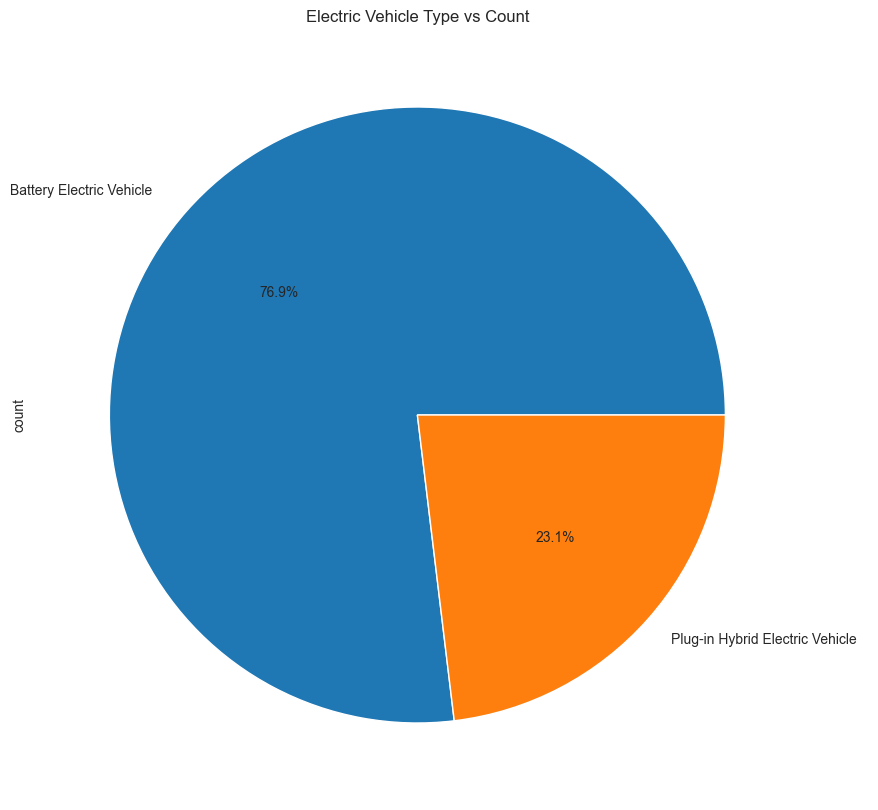

In [17]:
#plot pie chart for electric vehicle types
data['Electric Vehicle Type'].value_counts().plot(kind='pie',figsize=(20,10),autopct='%1.1f%%')
plt.title('Electric Vehicle Type vs Count')
plt.show()

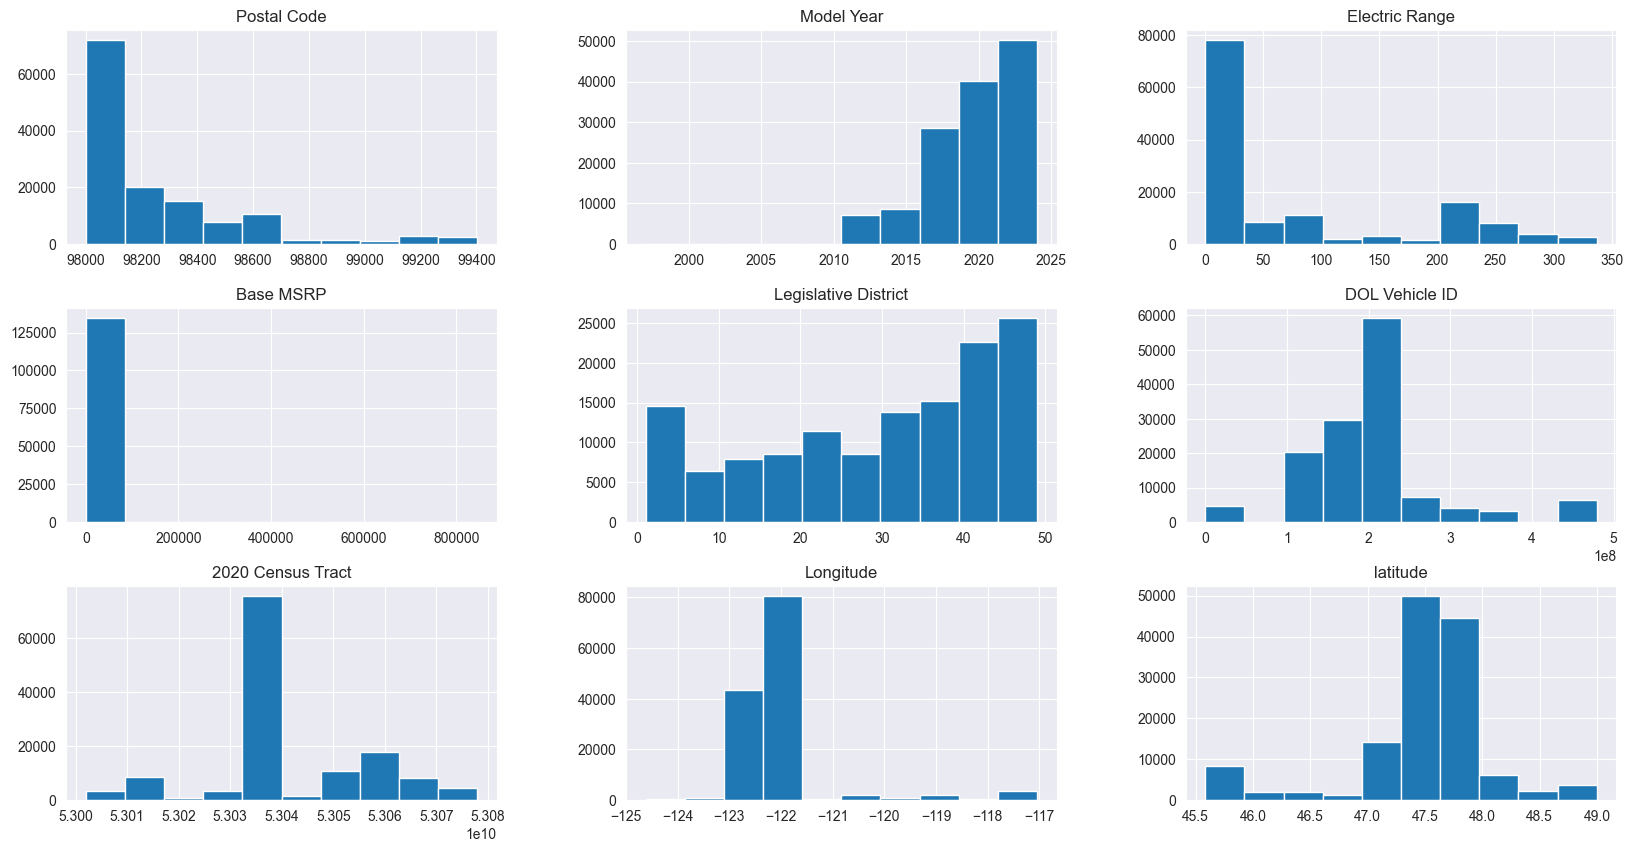

In [18]:
#plot the distribution of the data
data.hist(figsize=(20,10))
plt.show()

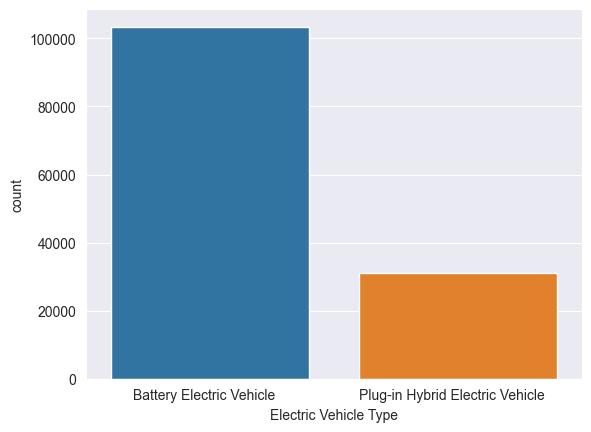

In [19]:
#plot the distribution of the electric vehicle type
sns.countplot(x='Electric Vehicle Type',data=data)
plt.show()

In [21]:
# find vehicle range statistics
data['Electric Range'].describe()

count    134474.000000
mean         74.730208
std          98.776037
min           0.000000
25%           0.000000
50%          21.000000
75%         150.000000
max         337.000000
Name: Electric Range, dtype: float64

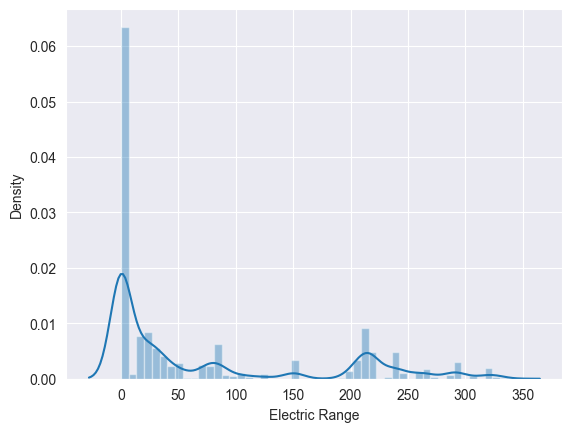

In [22]:
#plot the distribution of the electric range
sns.distplot(data['Electric Range'])
plt.show()

In [23]:
# find the top 5 popular electric vehicle manufacturers
data['Make'].value_counts().head(5)

Make
TESLA        61650
NISSAN       13138
CHEVROLET    11417
FORD          6876
BMW           5881
Name: count, dtype: int64

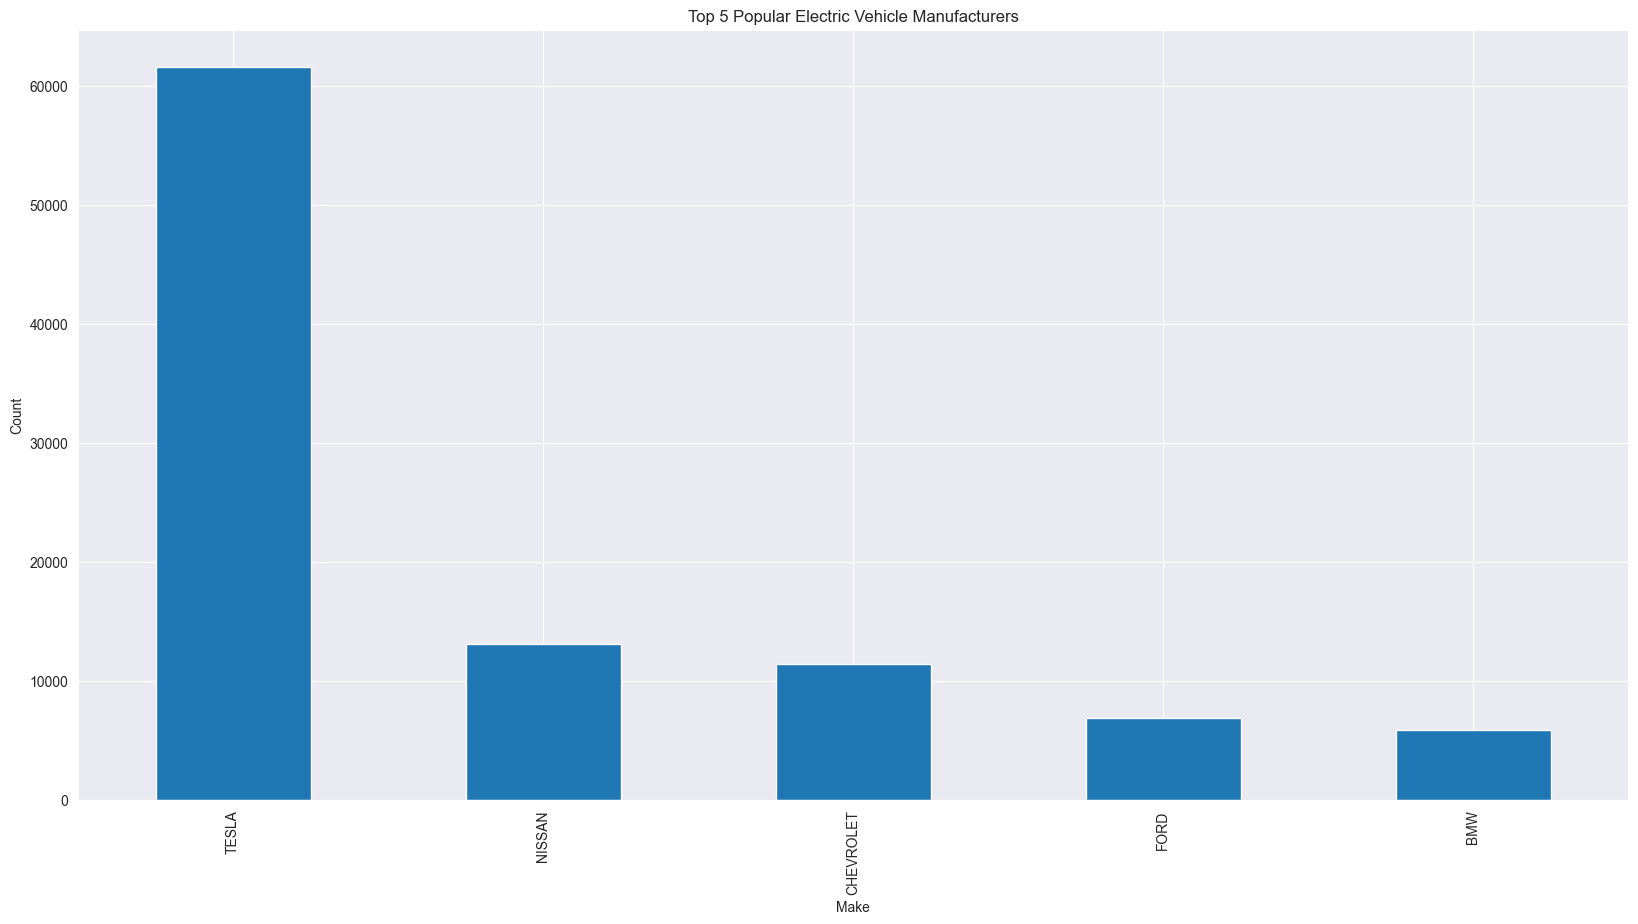

In [24]:
#plot the top 5 popular electric vehicle manufacturers
data['Make'].value_counts().head(5).plot(kind='bar',figsize=(20,10))
plt.xlabel('Make')
plt.ylabel('Count')
plt.title('Top 5 Popular Electric Vehicle Manufacturers')
plt.show()